In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from PIL import Image

%matplotlib inline


# Data loading

In [2]:
data = pd.read_csv('Data_Entry_2017.csv')

In [3]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,NaN


# Dataset cleaning

In [76]:
data = data.drop(["y]", "Follow-up #", "View Position", "Unnamed: 11",
                 "OriginalImagePixelSpacing[x","OriginalImage[Width", "Height]"], axis=1)


# Data visualisation


## Patient Gender


In [55]:
men_unique = len(data['Patient ID'][data['Patient Gender'] == 'M'].value_counts())
women_unique = len(data['Patient ID'][data['Patient Gender'] == 'F'].value_counts())
men_unique, women_unique

(16630, 14175)

In [56]:
data['Patient Gender'].value_counts()


M    63340
F    48780
Name: Patient Gender, dtype: int64

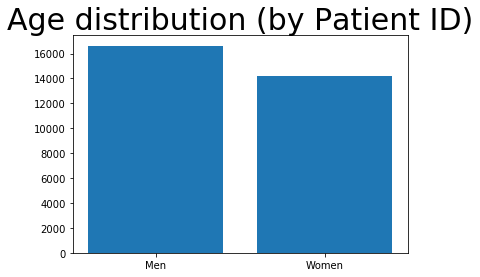

In [57]:
y_pos = np.arange(2)
plt.xticks(y_pos, ["Men", "Women"])
plt.bar(y_pos, [men_unique, women_unique], align='center')
plt.title('Age distribution (by Patient ID)', fontsize=30)

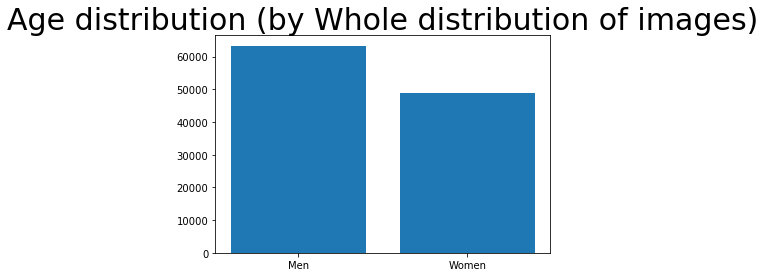

In [59]:
y_pos = np.arange(2)
plt.xticks(y_pos, ["Men", "Women"])
plt.bar(y_pos, [data['Patient Gender'].value_counts()[0], data['Patient Gender'].value_counts()[1]], align='center')
plt.title('Age distribution (by Whole distribution of images)', fontsize=30)

## Patient age


M    63340
F    48780
Name: Patient Gender, dtype: int64

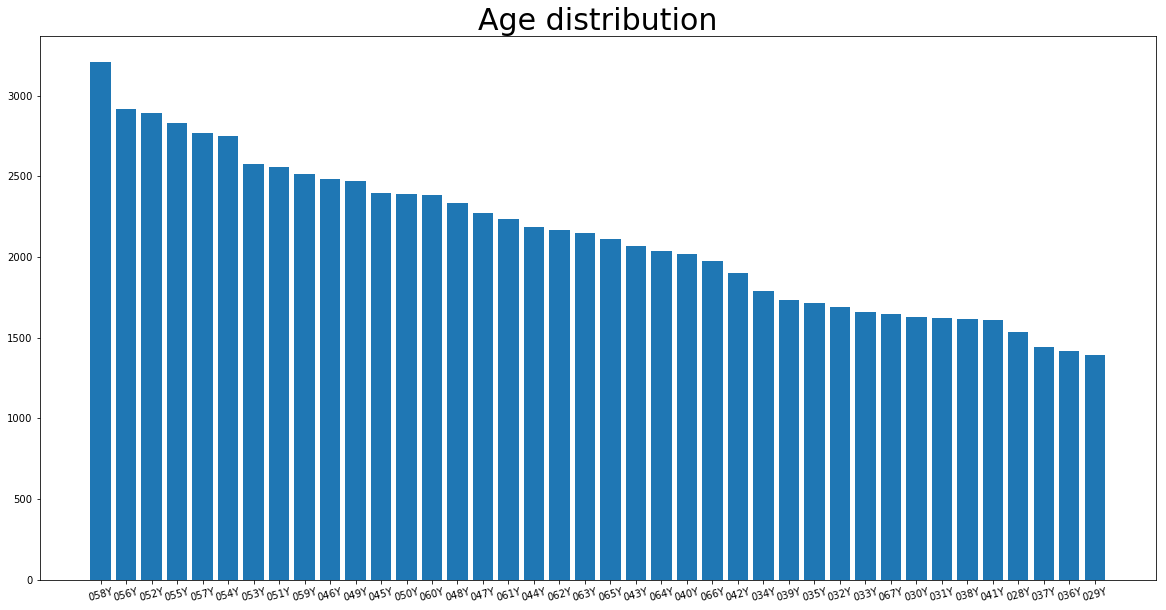

In [374]:
number_of_ages = 40
y_pos = np.arange(number_of_ages)
plt.figure(figsize=(20,10))
plt.xticks(y_pos, data['Patient Age'].value_counts().head(number_of_ages).index, rotation=15)
plt.bar(y_pos, data['Patient Age'].value_counts().head(number_of_ages).values, align='center')
plt.title('Age distribution', fontsize=30)

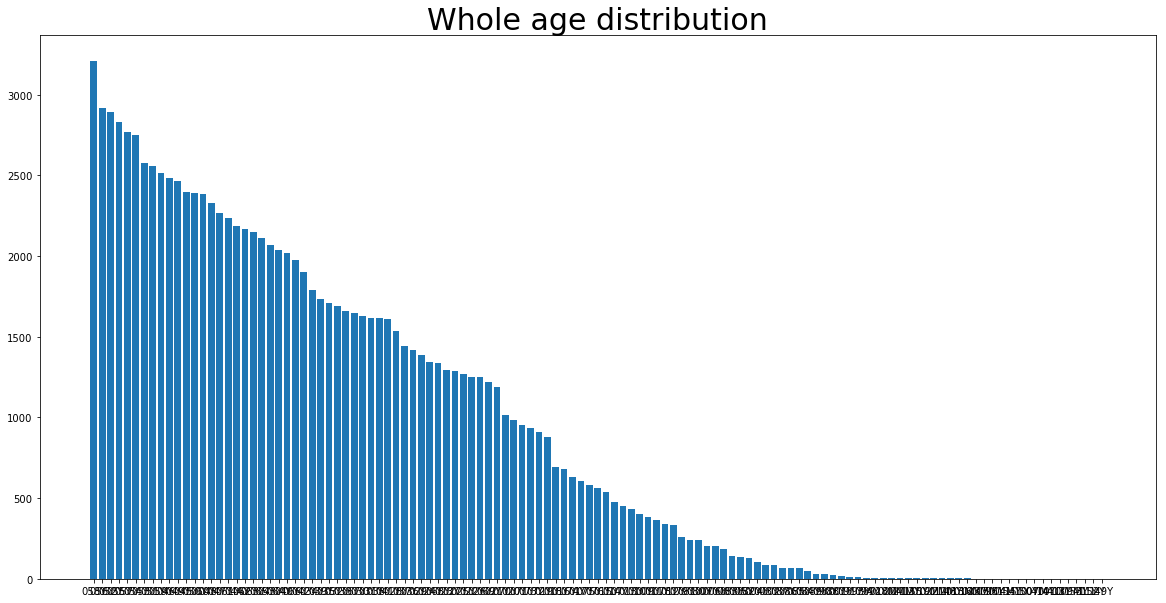

In [390]:
number_of_ages = 121
y_pos = np.arange(number_of_ages)

plt.figure(figsize=(20,10))
plt.xticks(y_pos, data['Patient Age'].value_counts().head(number_of_ages).index)
plt.bar(y_pos, data['Patient Age'].value_counts().head(number_of_ages).values, align='center')
plt.title('Whole age distribution', fontsize=30)

093Y    9
094Y    8
092Y    6
018M    4
020M    4
021M    3
412Y    3
155Y    2
019M    2
022M    2
011M    2
148Y    2
013M    2
016M    2
023M    1
005M    1
095Y    1
004M    1
154Y    1
151Y    1
150Y    1
007M    1
414Y    1
001D    1
413Y    1
009M    1
153Y    1
411Y    1
152Y    1
149Y    1
Name: Patient Age, dtype: int64

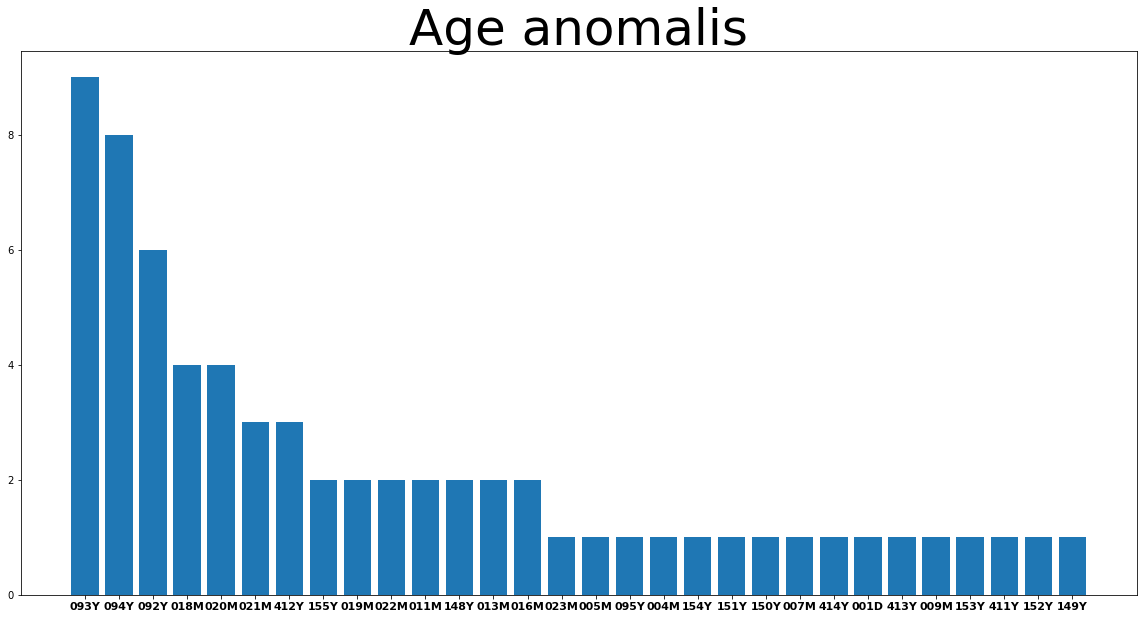

In [191]:
number_of_ages = 30
y_pos = np.arange(number_of_ages)

plt.figure(figsize=(20,10))
plt.xticks(y_pos, data['Patient Age'].value_counts()[-30:].index, fontsize=11, fontweight="bold")
plt.bar(y_pos, data['Patient Age'].value_counts()[-30:].values, align='center')
plt.title('Age anomalis', fontsize=50)
data['Patient Age'].value_counts()[-30:]

    

## Diseases distribution

In [365]:
unique_deseases = data["Finding Labels"][data["Finding Labels"].apply(lambda x: 
                                                    '|' not in x and (x != "No Finding"))].value_counts()


Infiltration          9551
Atelectasis           4212
Effusion              3959
Nodule                2706
Pneumothorax          2199
Mass                  2138
Consolidation         1314
Pleural_Thickening    1127
Cardiomegaly          1094
Emphysema              895
Fibrosis               727
Edema                  634
Pneumonia              307
Hernia                 110
Name: Finding Labels, dtype: int64

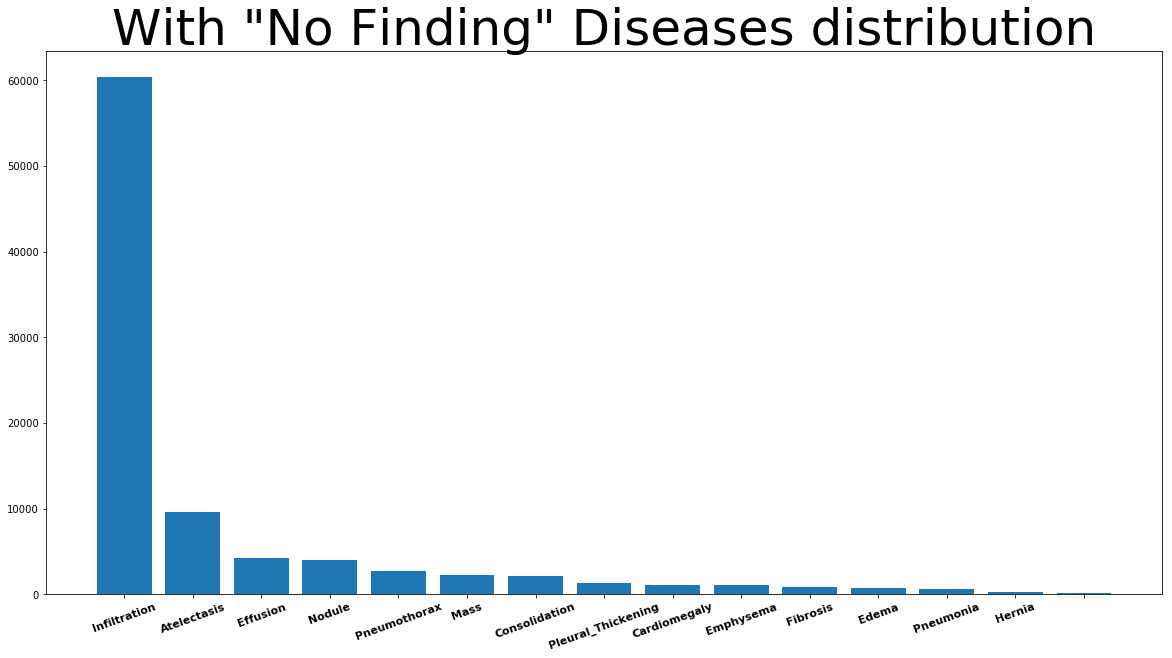

In [8]:
number_of_ages = 15
y_pos = np.arange(number_of_ages)

plt.figure(figsize=(20,10))
plt.xticks(y_pos, data["Finding Labels"][data["Finding Labels"].apply(lambda x: 
            '|' not in x and (x != "No Finding"))].value_counts().index, 
            fontsize=11, fontweight="bold", rotation=20)
plt.bar(y_pos, data["Finding Labels"][data["Finding Labels"].apply(lambda x: '|' not in x)].value_counts(), align='center')
plt.title('With "No Finding" Diseases distribution', fontsize=50)


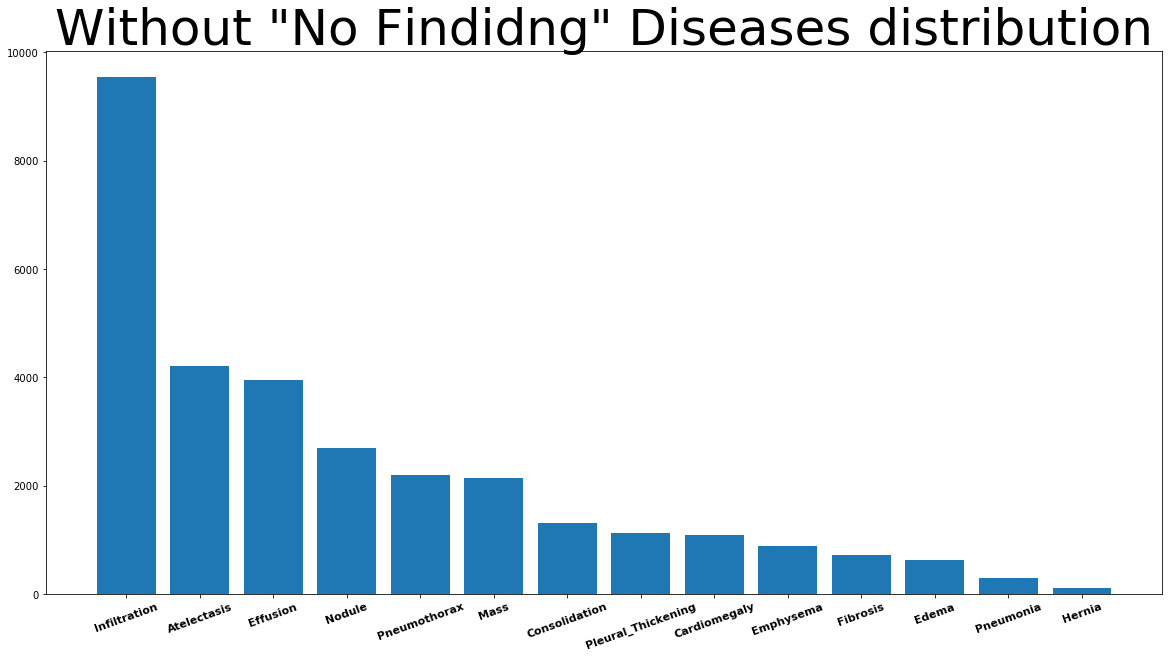

In [9]:
number_of_ages = 14
y_pos = np.arange(number_of_ages)

plt.figure(figsize=(20,10))
plt.xticks(y_pos, data["Finding Labels"][data["Finding Labels"].apply(lambda x: 
            '|' not in x and (x != "No Finding"))].value_counts().index, 
            fontsize=11, fontweight="bold", rotation=20)
plt.bar(y_pos, data["Finding Labels"][data["Finding Labels"].apply(lambda x: '|' not in x and (x != "No Finding"))].value_counts(), align='center')
plt.title('Without "No Findidng" Diseases distribution', fontsize=50)


## Patient ID

In [386]:
data['Patient ID'].value_counts().head(20)

10007    184
13670    173
15530    158
12834    157
13993    143
1836     137
19124    130
20213    119
17138    117
11237    116
13111    116
21201    114
17236    111
20326    109
19176    108
6271     108
14022    108
4808     102
16587     99
18253     91
Name: Patient ID, dtype: int64

## Data labales getting

In [6]:
def category_transform(arguments):
#     result = list()
#     arguments = arguments.split('|')
#     deseas_codes = {"Atelectasis": 0, "Hernia":1, "Cardiomegaly": 2, "Effusion": 3, "Infiltration": 4,
#                     "Mass": 5, "Nodule": 6, "Pneumonia": 7, "Pneumothorax": 8, "Consolidation": 9, 
#                     "Edema": 10, "Emphysema": 11, "Fibrosis": 12, "Pleural_Thickening": 13, "No Finding": 14
#                    }
#     for desease in arguments:
#         result.append(deseas_codes[desease])
#     print(result)

#     return result
    if "No Finding" in arguments:
        return 0
    return 1

In [7]:
y = data['Finding Labels'][:4998]

In [8]:
save_result = y.apply(category_transform)

In [73]:
# save_result.to_csv('binary_dataset.csv')

In [96]:
def labels_writer():
    with open('images_labels.txt', 'w') as a_f:
        for image in new_y.values:
            a_f.write(str(image[1]) + ' ' + str(image[0]) + '\n')

In [2]:
# RESIZING
def readf(new_img_size, source_folder, output_folder):
    try:
        input_dir  = source_folder.rstrip('/')  # path to img source folder
        img_size   = str(new_img_size)  # The image size (128, 256,etc)
        output_dir  = output_folder.rstrip('/') # output directory
        print("starting....")
        print ("Colecting data from %s " % input_dir)
        tclass = [ d for d in os.listdir( input_dir ) ]
        counter = 0
        strdc = ''
        hasil = []
        for x in tclass:
            list_dir =  os.path.join(input_dir, x )
            list_tuj = os.path.join(output_dir+'/', x+'/')
            print()
            if not os.path.exists(list_tuj):
                os.makedirs(list_tuj)
            if os.path.exists(list_tuj):
                for d in os.listdir(list_dir):
#                     try:
                    img = Image.open(os.path.join(input_dir+'/'+x,d))
                    img = img.resize((int(img_size),int(img_size)),Image.ANTIALIAS)
                    fname,extension = os.path.splitext(d)
                    newfile = fname+extension
                    if extension != ".png" :
                        newfile = fname + ".png"
                    img.save(os.path.join(output_dir+'/'+x,newfile),"PNG",quality=90)
                    print ("Resizing file : %s - %s " % (x,d))
#                     except Exception,e:
#                         print ("Error resize file : %s - %s " % (x,d))
#                         sys.exit(1)
                counter +=1
    except Exception,e:
        print("Error, check Input directory etc : ", e)
        sys.exit(1)
readf(128, '/home/bohdan/xray_project/images/', '/home/bohdan/xray_project/resized_images_1288/')

starting....
Colecting data from /home/bohdan/xray_project/images 
()
Resizing file : cat - 00000001_000.png 
Resizing file : cat - 00000001_001.png 
Resizing file : cat - 00000001_002.png 
Resizing file : cat - 00000002_000.png 
Resizing file : cat - 00000003_000.png 
Resizing file : cat - 00000003_001.png 
Resizing file : cat - 00000003_002.png 
Resizing file : cat - 00000003_003.png 
Resizing file : cat - 00000003_004.png 
Resizing file : cat - 00000003_005.png 
Resizing file : cat - 00000003_006.png 
Resizing file : cat - 00000003_007.png 
Resizing file : cat - 00000004_000.png 
Resizing file : cat - 00000005_000.png 
Resizing file : cat - 00000005_001.png 
Resizing file : cat - 00000005_002.png 
Resizing file : cat - 00000005_003.png 
Resizing file : cat - 00000005_004.png 
Resizing file : cat - 00000005_005.png 
Resizing file : cat - 00000005_006.png 
Resizing file : cat - 00000005_007.png 
Resizing file : cat - 00000006_000.png 
Resizing file : cat - 00000007_000.png 
Resizing f

KeyboardInterrupt: 

In [ ]:
def load_images(images_path, path_to_labels):
    path_to_images = images_path
    labels_file = path_to_labels
    images_labels = {}
    with open(labels_file, 'r') as f:
        dict_labels = dict([line.strip().split() for line in f.readlines()])
        
    files = os.listdir(path_to_images)

    files = filter( lambda files: not files.startswith('.'), files)

    # Create structure for holding images
    images = np.zeros((len(files), 3, 64,64), dtype=np.uint8)
    labels = np.zeros(len(files), dtype=np.uint8)
    for fid, file in enumerate(files):
            if fid % 1000 == 0:
                    print(fid)
            image = misc.imread(path_to_images + '/' + file)
            if (image.shape == (64,64,4)):
                image = image[:,:,:3]
            if image.shape == (64,64):
                print(file)
            images[fid] = image.T
            labels[fid] = int(dict_labels[file])
    return images, labels

In [ ]:
images, labels = load_images()